<a href="https://colab.research.google.com/github/NikolValerie/homework/blob/main/yolo5detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt # install
!pip install roboflow

In [2]:
import torch
from PIL import Image
import os
import matplotlib.pyplot as plt
from torchvision.io import read_image

In [ ]:
!mkdir imgs
!wget -O imgs/image1.jpg https://thumbs.dreamstime.com/b/%D0%BF%D0%B0%D1%80%D1%8B-%D0%BA%D1%80%D1%8B%D1%81-%D1%81%D0%B8-%D1%8F-%D0%B8-%D0%BE%D0%B1%D0%BD%D1%8E%D1%85%D0%B8%D0%B2%D0%B0%D1%8F-67202830.jpg
!wget -O imgs/image2.jpg https://kotmatroskin.nnov.ru/userfiles/news/large/339_morskie-svinki-soderzhanie.jpg

In [ ]:
!python /content/yolov5/detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source imgs

In [7]:
path = 'runs/detect/exp/'

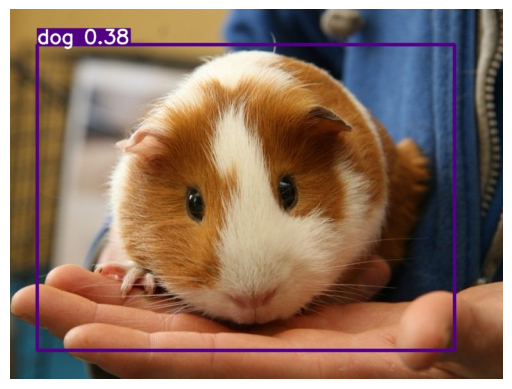

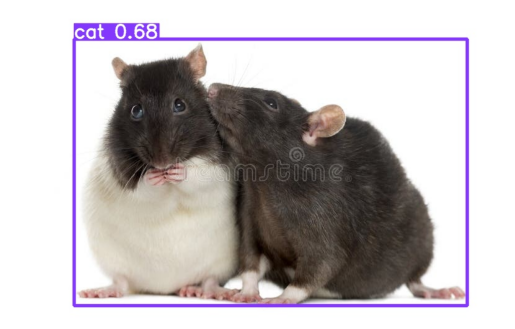

In [8]:
for i in os.listdir(path):
    plt.imshow((read_image(os.path.join(path, i)).permute(1, 2, 0)))
    plt.axis('off')
    plt.show()

In [9]:
from roboflow import Roboflow
rf = Roboflow(api_key="xxxxxxxxxxxxxxx")
project = rf.workspace("homework-rruqe").project("small-animals-classifier")
version = project.version(3)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to small-animals-classifier-3 in yolov5pytorch:: 100%|██████████| 732/732 [00:00<00:00, 5287.48it/s]


In [10]:
!python /content/yolov5/train.py --batch 20 --epochs 15 --data /content/yolov5/small-animals-classifier-3/data.yaml --weights yolov5m.pt --cache

2024-04-02 13:02:47.989406: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 13:02:47.989513: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 13:02:48.133097: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=/content/yolov5/small-animals-classifier-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=15, batch_size=20, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, 

In [11]:
from torchvision import transforms as T
model = torch.hub.load(
    repo_or_dir = '.', # будем работать с локальной моделью в текущей папке
    model = 'custom', # непредобученная
    path='/content/yolov5/runs/train/exp/weights/best.pt', # путь к нашим весам
    source='local' # откуда берем модель – наша локальная
    )

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20861016 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


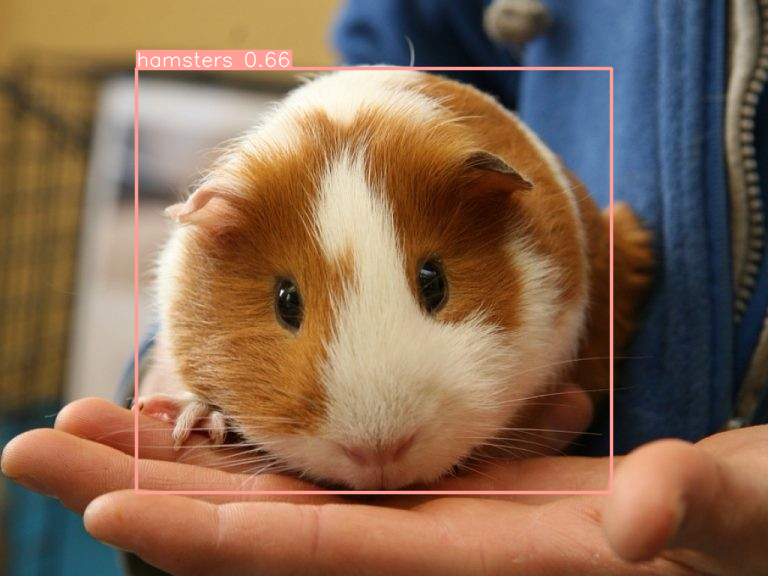

In [14]:
model.conf = 0.05 # устанавливаем порог
# Image
img = T.ToPILImage()(read_image('/content/yolov5/imgs/image2.jpg'))
model.eval()
# Inference
results = model(img)
# results.show()  # or .show(), .save(), .crop(), .pandas(), etc
results.show()

In [ ]:
results.pandas().xyxy[0]